In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
def PCA_decomp(X, M):
    #CENTRIRANJE UZORAKA
    #s = StandardScaler(with_std=False)
    #X_center = s.fit_transform(X)
    X_center = X-np.mean(X,axis=0)
    
    #RACUNANJE KOVARIJANSNE MATRICE I KK VREDNOSTI I VEKTORA
    X_cov = np.cov(X_center.transpose())
    eig_val, vec = np.linalg.eig(X_cov)
    
    #SORTIRANJE KK VREDNOSTI U OPADAJUCEM REDOSLEDU I RACUNANJE UDELA OBJ.VAR.
    ind = np.argsort(eig_val)[::-1]
    eig_val = np.sort(eig_val)[::-1]
    udeo_komp = eig_val/sum(eig_val)
    
    #SORTIRANJE KK VEKTORA I PROJEKCIJA
    eig_vec = vec[:,ind]
    X_redukovano = np.matmul(eig_vec[:, :M].transpose(),X.transpose())
    X_redukovano = X_redukovano.transpose()
    
    return eig_val, eig_vec, udeo_komp, X_redukovano

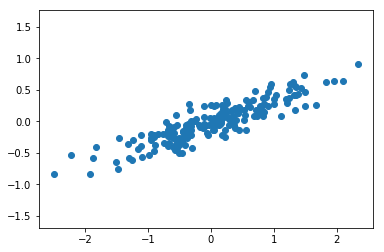

In [3]:
#ISCRTAVANJE PODATAKA
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

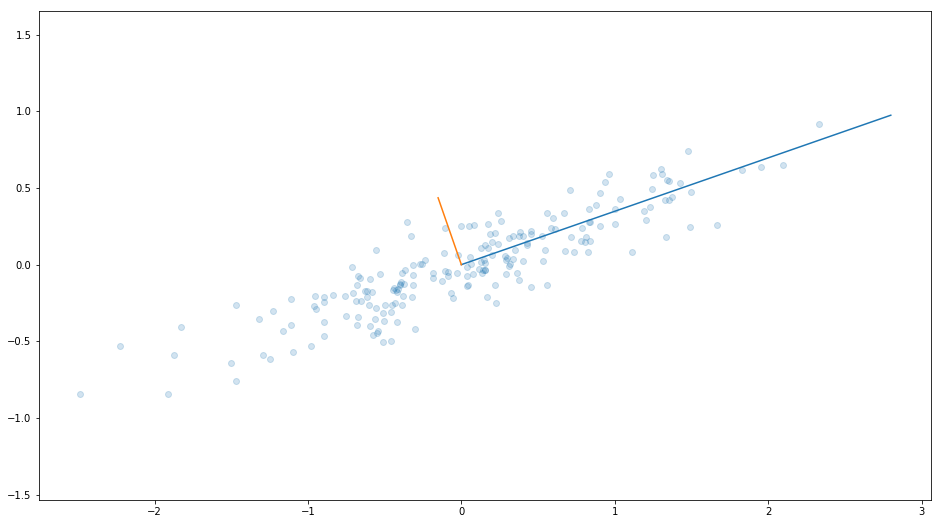

In [4]:
#PRIMENA PCA
eig_val, eig_vec, udeo_komp, X_redukovano = PCA_decomp(X, 2)

#ILUSTRACIJA
plt.figure(figsize=(16,9))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(udeo_komp, eig_vec.transpose()):
    v = vector*3*np.sqrt(length)
    plt.plot([0,v[0]], [0,v[1]])
plt.axis('equal');

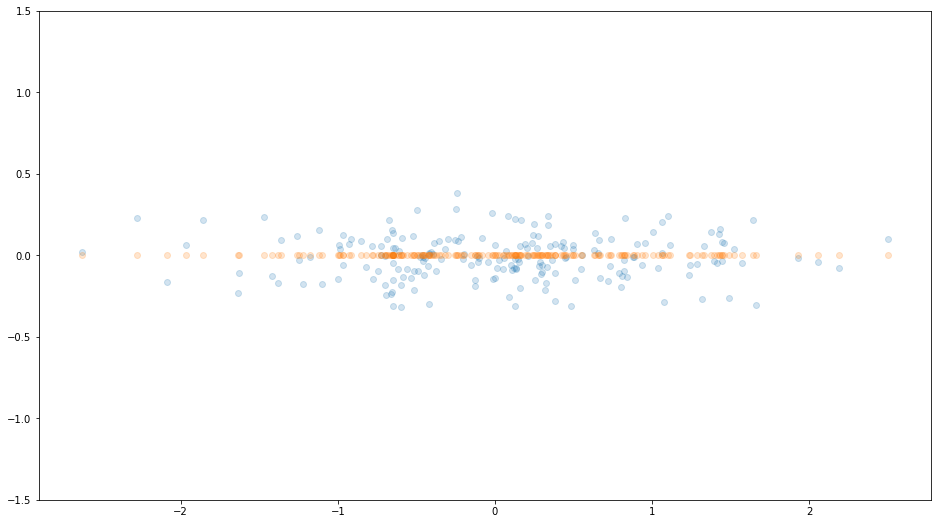

In [5]:
eig_val, eig_vec, udeo_komp, X_redukovano = PCA_decomp(X, 2)
plt.figure(figsize=(16,9))
plt.scatter(X_redukovano[:, 0], X_redukovano[:, 1], alpha=0.2)
plt.ylim([-1.5,1.5])

val, eig_vec, udeo_komp, X_redukovano = PCA_decomp(X, 1)
plt.scatter(X_redukovano[:, 0], np.zeros(X_redukovano.shape), alpha=0.2)